/Users/parton/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


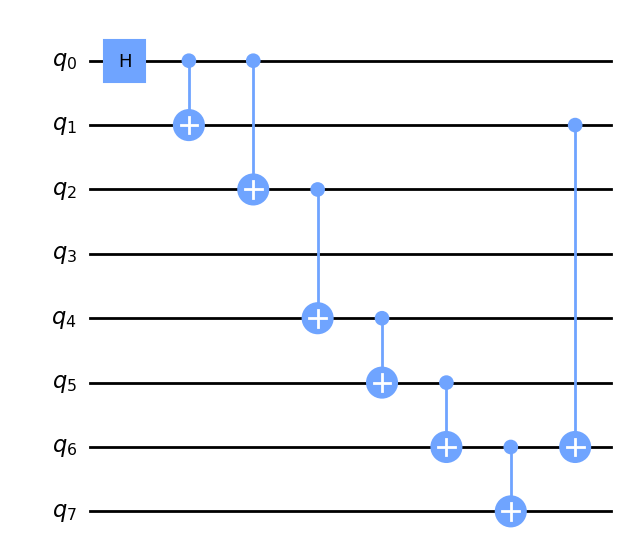

In [1]:
# create a quantum circuit and convert it into a lattice surgery polycube
from floorplan import *
from compile_qc_to_ls import *
from random_qc import *
from qiskit.circuit import QuantumCircuit

# Create a random quantum circuit

qc = QuantumCircuit(8)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(2, 4)
qc.cx(4, 5)
qc.cx(5, 6)
qc.cx(6, 7)
qc.cx(1, 6)
qc.draw(output='mpl')

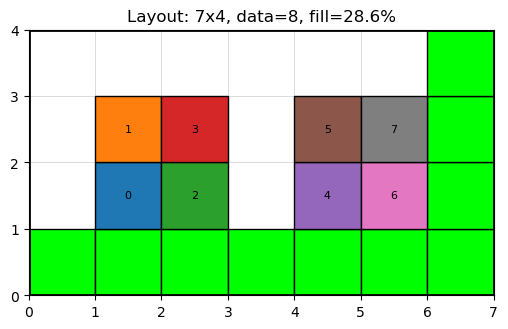

In [2]:
floorplan =  place_surface_code_qubits_without_size_const(num_data_qubits = qc.num_qubits,  frame = ["bottom","right"], pattern = "block44")
visualize_qubit_layout(floorplan, show_data_indices=True)

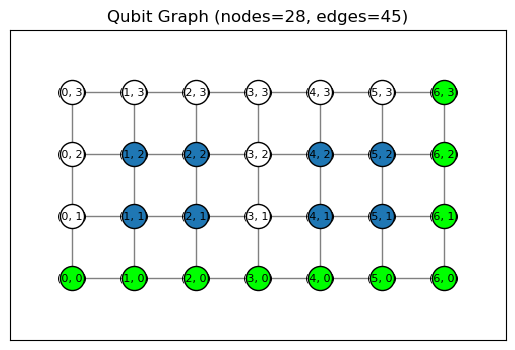

In [3]:
# visualize floorplan as a graph
G = build_graph_from_qubit_floorplan(floorplan)
visualize_qubit_graph(G, show_labels=True)

In [4]:
# convert qc to lattice surgery
LS =  qc_to_LS(qc, floorplan)
LS

[['1Q', [(1, 1)], [0]],
 ['2Q', [(1, 1), (1, 2)], [0, 1]],
 ['2Q', [(1, 1), (2, 1)], [0, 2]],
 ['2Q', [(2, 1), (3, 1), (4, 1)], [2, 4]],
 ['2Q', [(4, 1), (4, 2)], [4, 5]],
 ['2Q', [(4, 2), (5, 2), (5, 1)], [5, 6]],
 ['2Q', [(5, 1), (5, 2)], [6, 7]],
 ['2Q', [(1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1)], [1, 6]]]

In [5]:
polycube = LS_to_polycube(LS, floorplan)
polycube

[[1, 1, 0],
 [1, 2, 0],
 [2, 1, 0],
 [2, 2, 0],
 [4, 1, 0],
 [4, 2, 0],
 [5, 1, 0],
 [5, 2, 0],
 [1, 1, 1],
 [1, 2, 1],
 [2, 1, 1],
 [2, 2, 1],
 [4, 1, 1],
 [4, 2, 1],
 [5, 1, 1],
 [5, 2, 1],
 [1, 1, 2],
 [2, 1, 2],
 [1, 2, 2],
 [2, 2, 2],
 [4, 1, 2],
 [4, 2, 2],
 [5, 1, 2],
 [5, 2, 2],
 [2, 1, 3],
 [3, 1, 3],
 [4, 1, 3],
 [1, 1, 3],
 [1, 2, 3],
 [2, 2, 3],
 [4, 2, 3],
 [5, 1, 3],
 [5, 2, 3],
 [4, 1, 4],
 [4, 2, 4],
 [1, 1, 4],
 [1, 2, 4],
 [2, 1, 4],
 [2, 2, 4],
 [5, 1, 4],
 [5, 2, 4],
 [4, 2, 5],
 [5, 2, 5],
 [5, 1, 5],
 [1, 1, 5],
 [1, 2, 5],
 [2, 1, 5],
 [2, 2, 5],
 [4, 1, 5],
 [5, 1, 6],
 [5, 2, 6],
 [1, 1, 6],
 [1, 2, 6],
 [2, 1, 6],
 [2, 2, 6],
 [4, 1, 6],
 [4, 2, 6],
 [1, 2, 7],
 [2, 2, 7],
 [2, 1, 7],
 [3, 1, 7],
 [4, 1, 7],
 [5, 1, 7]]

In [6]:
# Create job requests from random quantum circuits
# it will create a json file

width = 11 # width of the quantum processor
unit_time = 50 # unit time for interval between jobs. It is randomly sampled from 1-4 * Unit_time
num_qc = 500 # number of quantum circuits
num_qubits = [5,100] # num_qubits are randomly sampled from this range
layers = [1,10] # number of layers are randomly sampled from this range
json_file_name = "programs_from_random_qc.json" # json file name 
random_circuit_to_json_with_fixed_width(width, unit_time = unit_time, num_qc = num_qc,num_qubits=num_qubits, layers=layers, json_file_name = json_file_name)

saved as: programs_from_random_qc.json


True

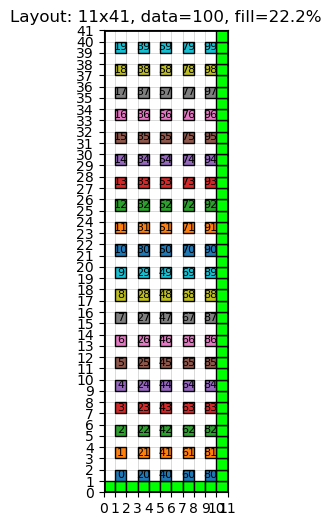

In [ ]:
# if you want to check the max height you need for a fixed width and number of qubits
# you can use the following function
# it will return autofloorplan
auto_floorplan(num_qubits[1], width, pattern = "block25")